<a href="https://colab.research.google.com/github/Shaikmd3797/diamond-price-prediction/blob/main/DIAMONDS_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTING THE PRICE OF DIAMOND USING GIVEN FEATURES**

**1st JAR OF ML**

**1) DATA JAR**


In [61]:
import pandas as pd
import numpy as np

In [62]:
df=pd.read_csv('diamonds.csv')
df.shape

(53940, 10)

**i)drop duplicates from the dataset**

In [63]:
df=df.drop_duplicates()
df.shape

(53794, 10)

**ii)check the structure of datasets**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [65]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**iii) Checking Null values**

In [66]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**iv)Treating Outliers**

In [67]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [68]:
def removing_null(df,column):
  df[column]=df[column].replace(0,np.NaN)
  df[column]=df[column].fillna(df[column].mean())
  return df

In [69]:
df=removing_null(df,['x','y','z'])

In [70]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731960,5.735293,3.539964
std,0.47339,1.429909,2.233679,3988.114460,1.118786,1.139601,0.701893
min,0.20000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [71]:
def treat_outliers(df,column):
  q1=df[column].quantile(0.25)
  q3=df[column].quantile(0.75)
  lower=q1-1.5*(q3-q1)
  upper=q3+1.5*(q3-q1)
  df[column]=df[column].clip(lower,upper)
  return df[column]

In [72]:
features=df.drop('price',axis=1).columns

In [73]:
num_features=['carat','depth','table','x','y','z']

In [74]:
for i in num_features:
  df[i]=treat_outliers(df,i)
df.describe()

,carat,depth,table,price,x,y,z
count,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.792471,61.748112,57.439612,3933.065082,5.731796,5.733815,3.539270
std,0.456694,1.269642,2.160989,3988.114460,1.118213,1.110370,0.690471
min,0.200000,58.750000,51.500000,326.000000,3.730000,3.680000,1.230000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,2.000000,64.750000,63.500000,18823.000000,9.285000,9.270000,5.710000


In [75]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,58.75,63.5,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.80,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.10,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.80,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.00,58.0,2757,6.15,6.12,3.74


**V)   EDA**

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
cat_features=['cut','color','clarity']

In [78]:
def EDA(df,num,cat,target):
  for i in num:
    plt.figure(figsize=(15,10))
    sns.scatterplot(data=df,x=i,y=target)
    plt.show()
  for i in cat:
    plt.figure(figsize=(15, 10))
    df.groupby(i)[target].mean().sort_values().plot(kind='barh')
    plt.show()



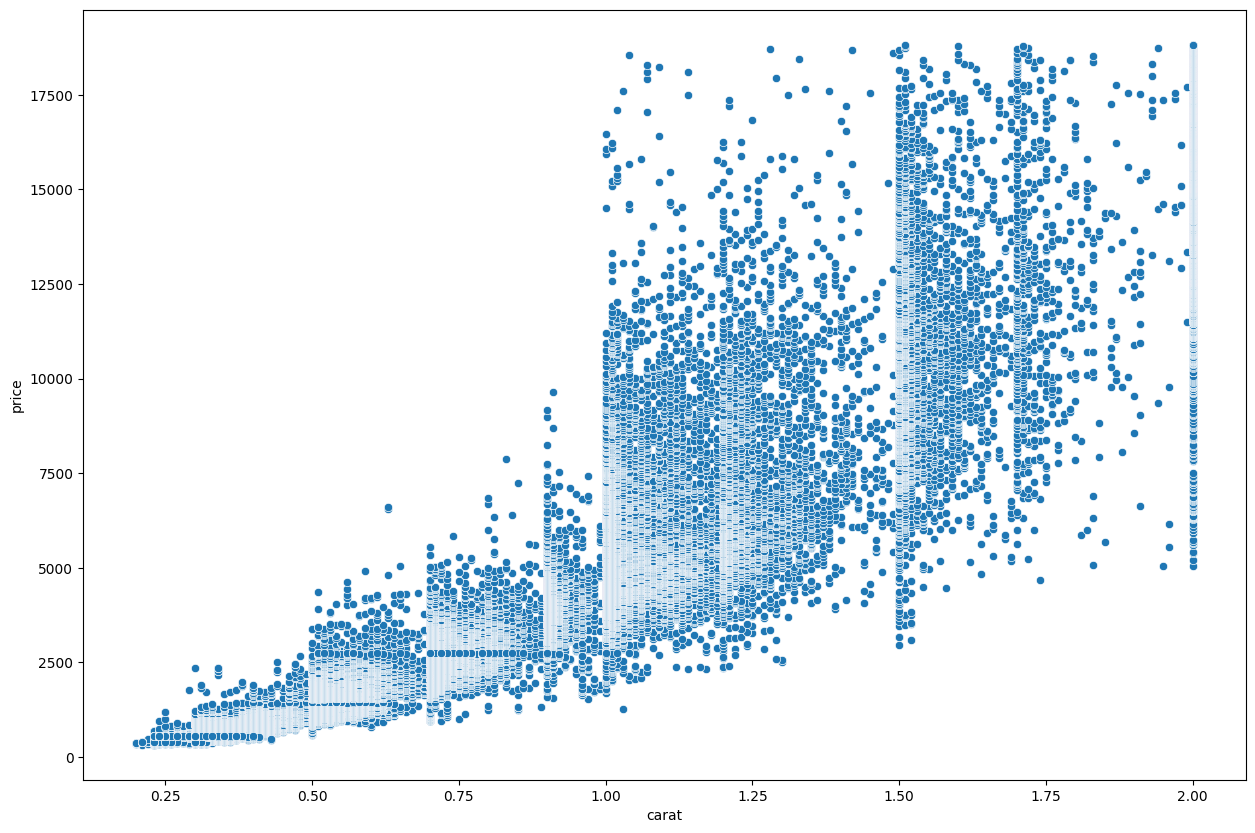

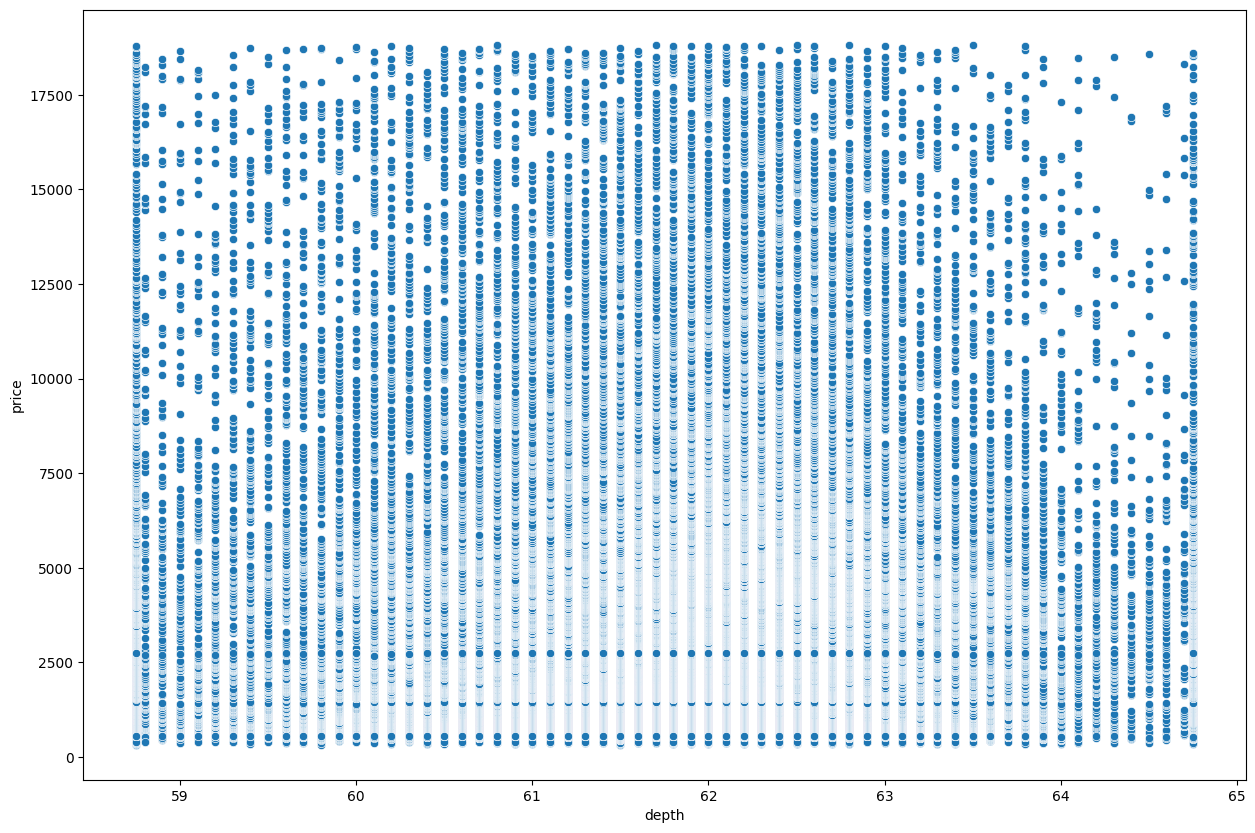

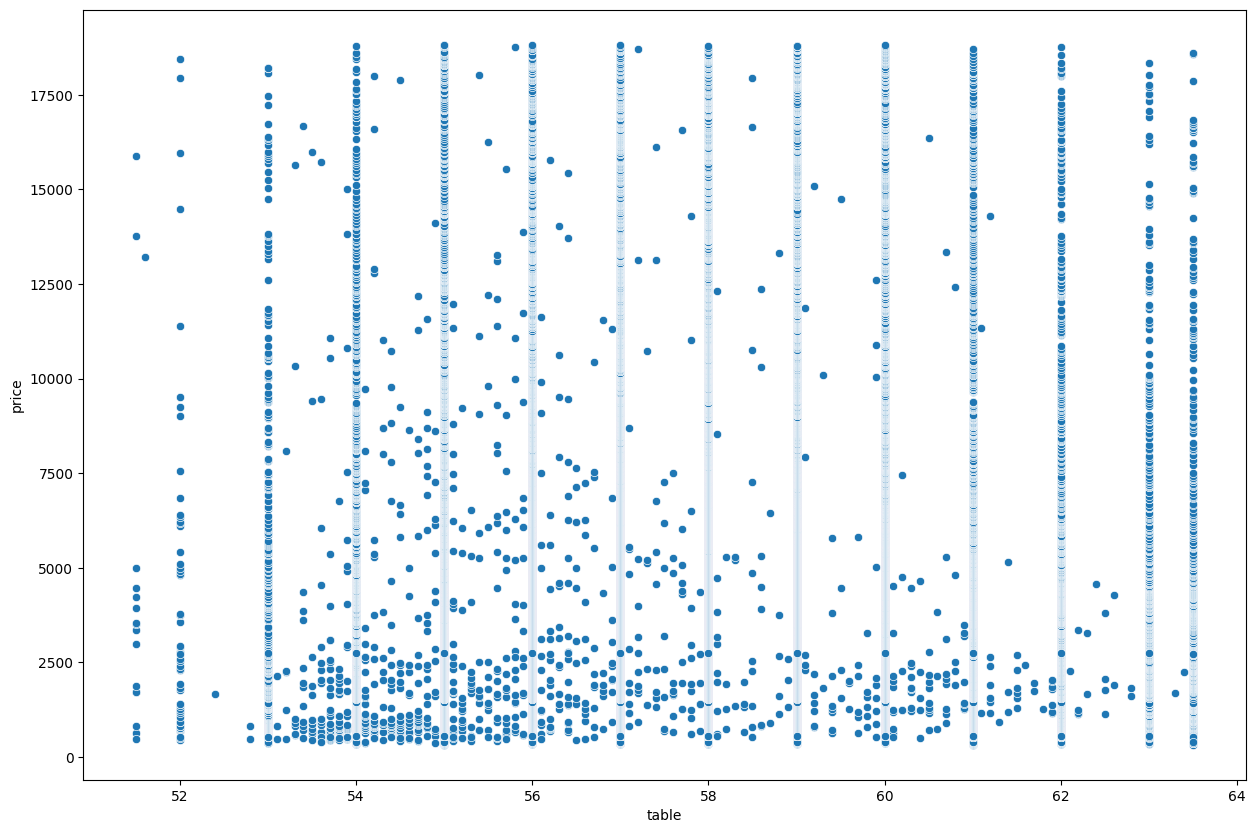

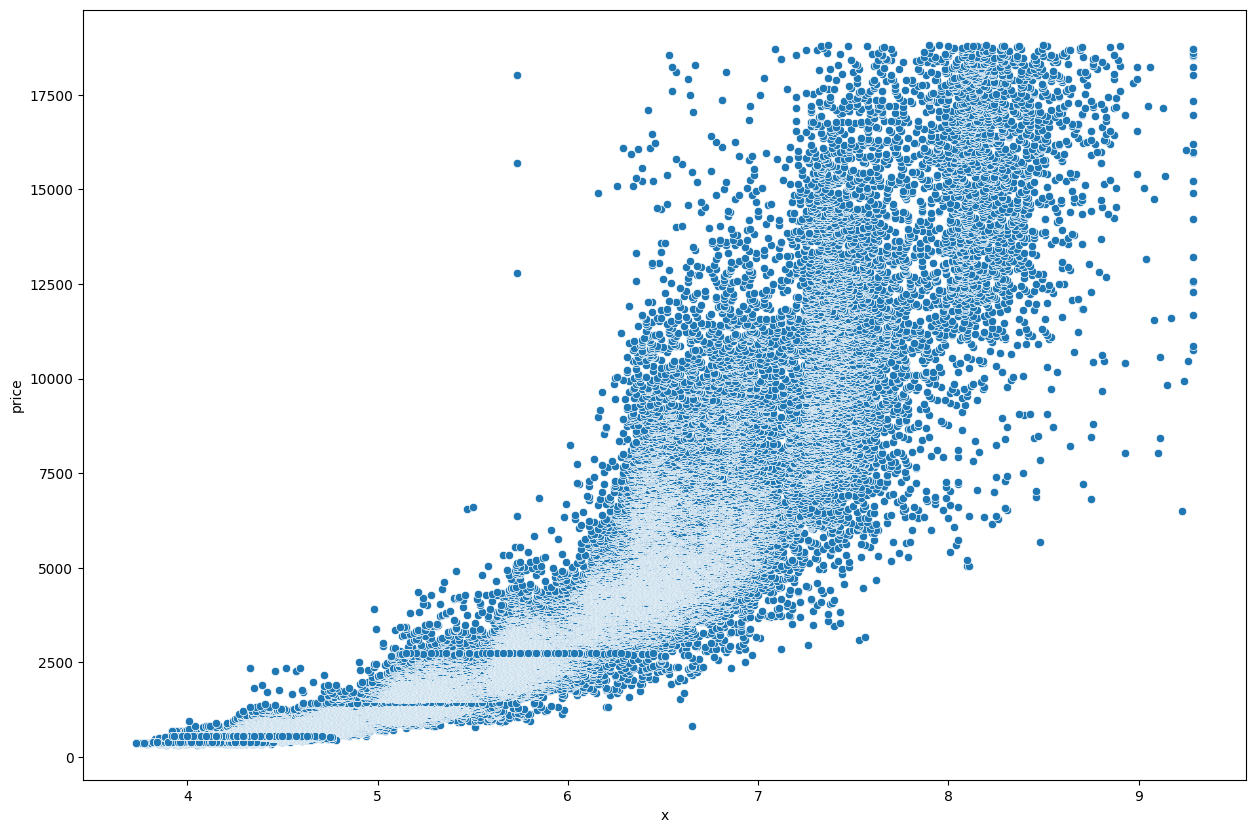

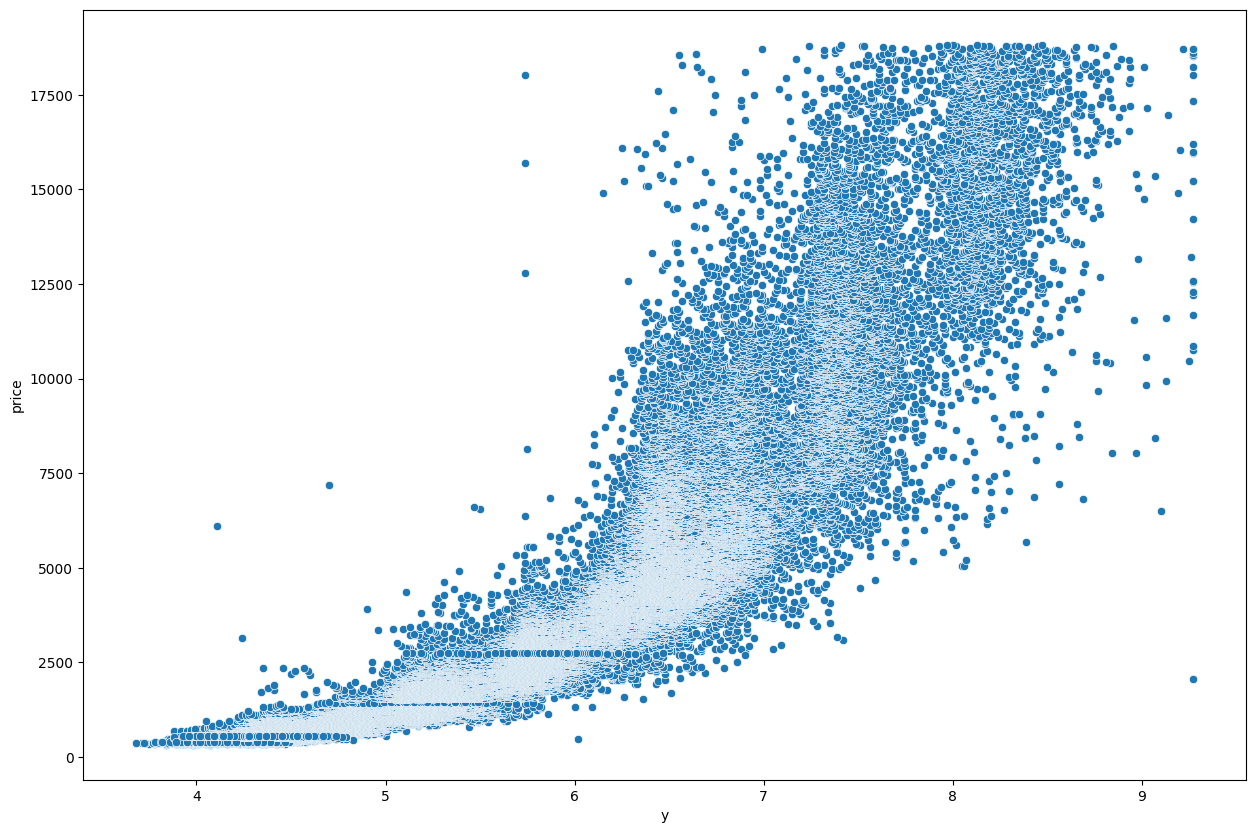

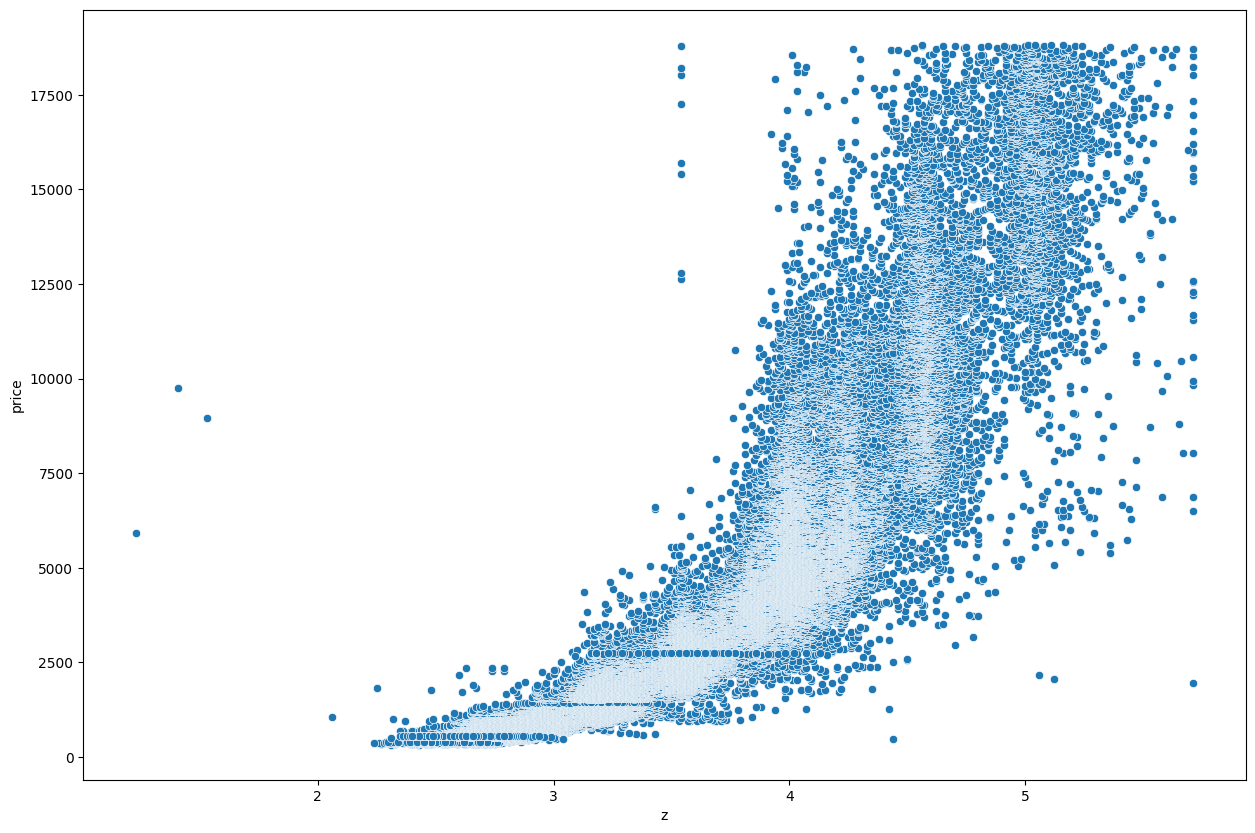

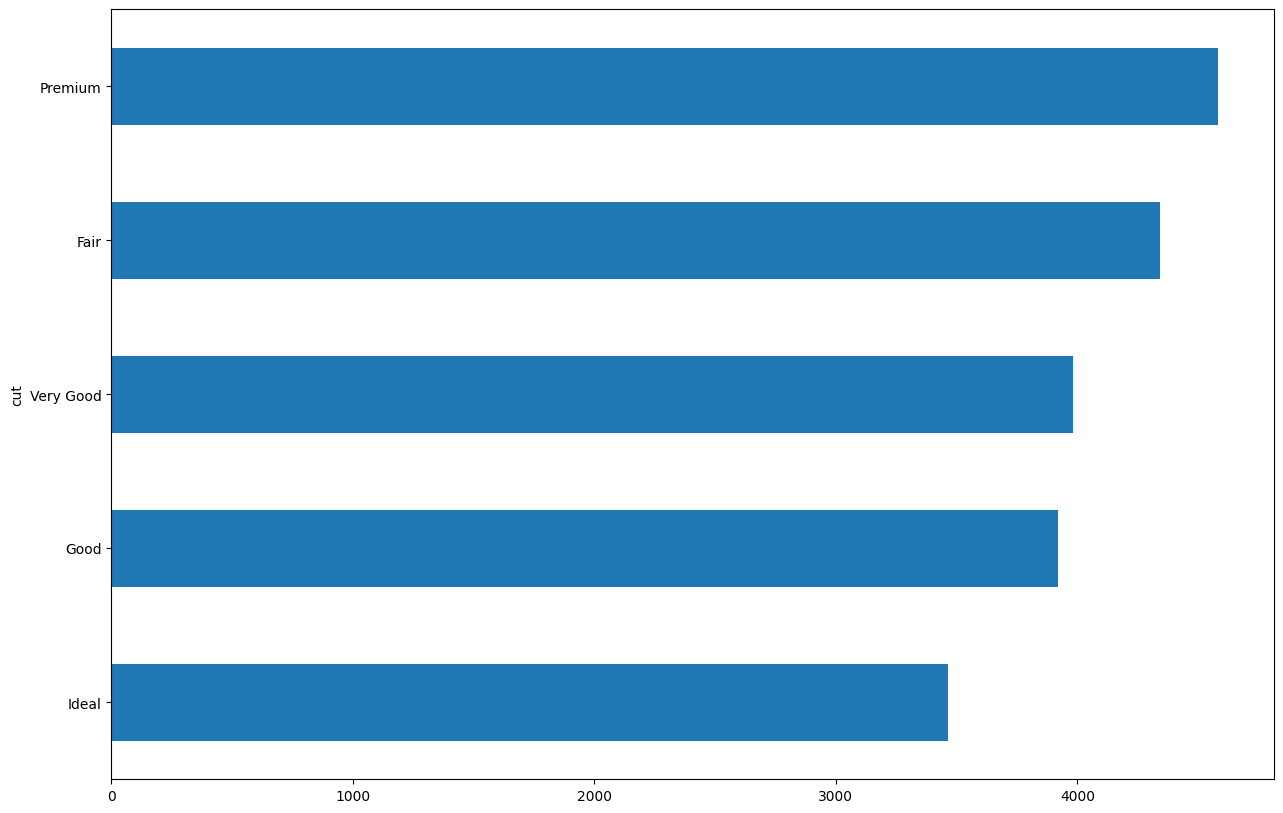

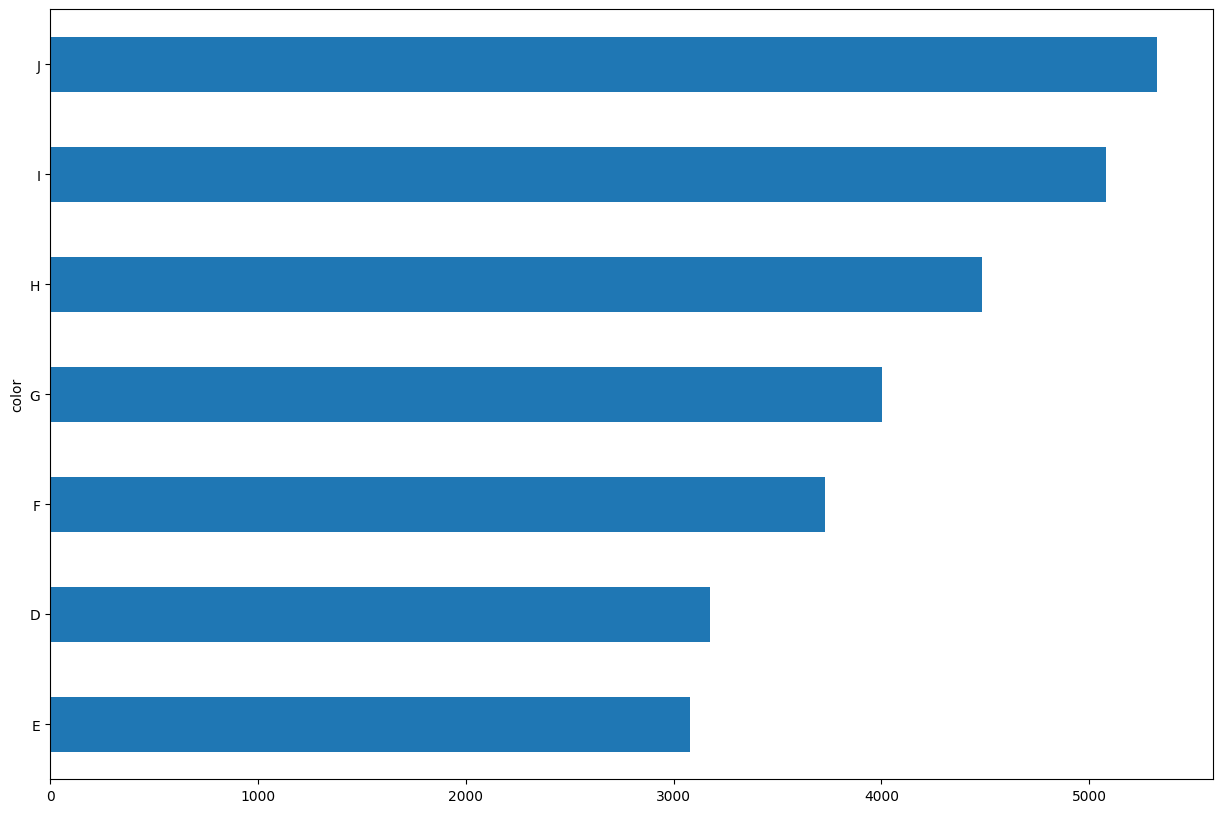

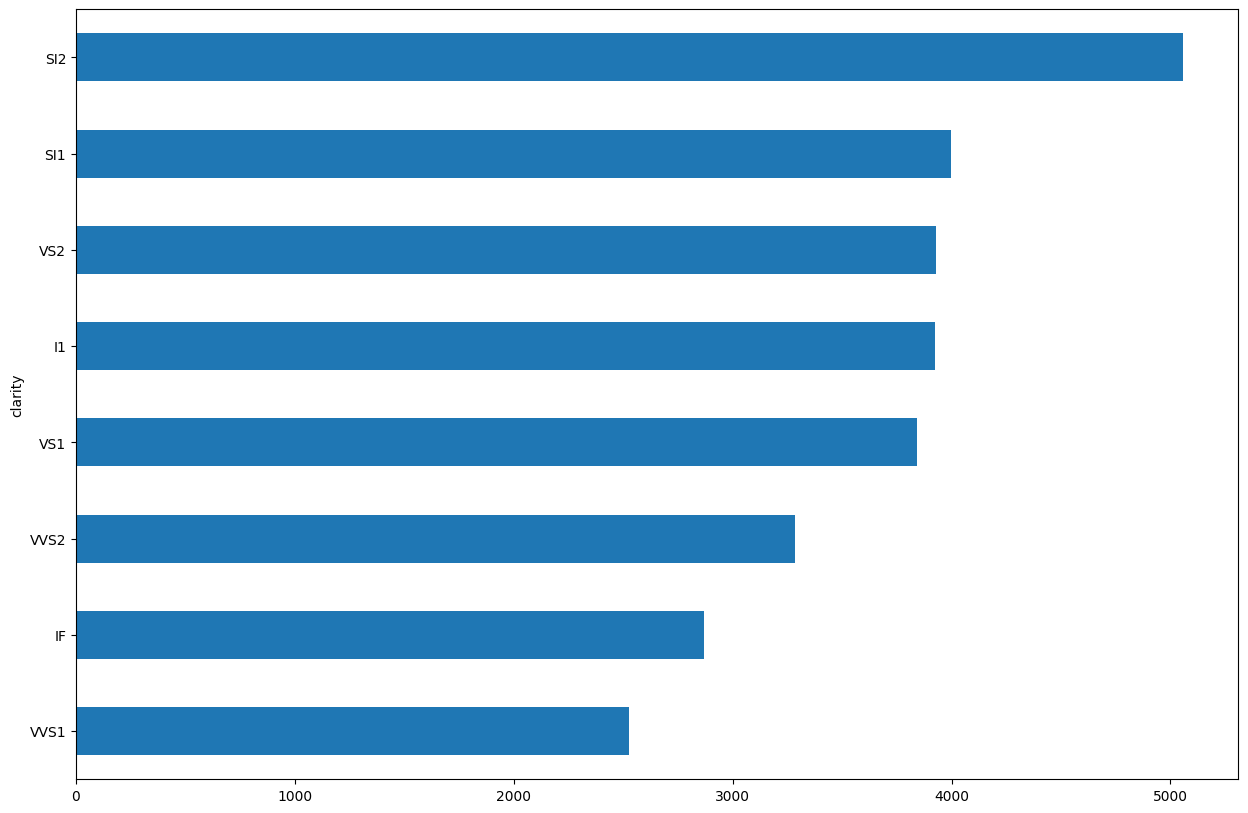

In [79]:
EDA(df,num_features,cat_features,'price')

<ipython-input-80-6e5c6576a8e0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='RdBu_r',annot=True)


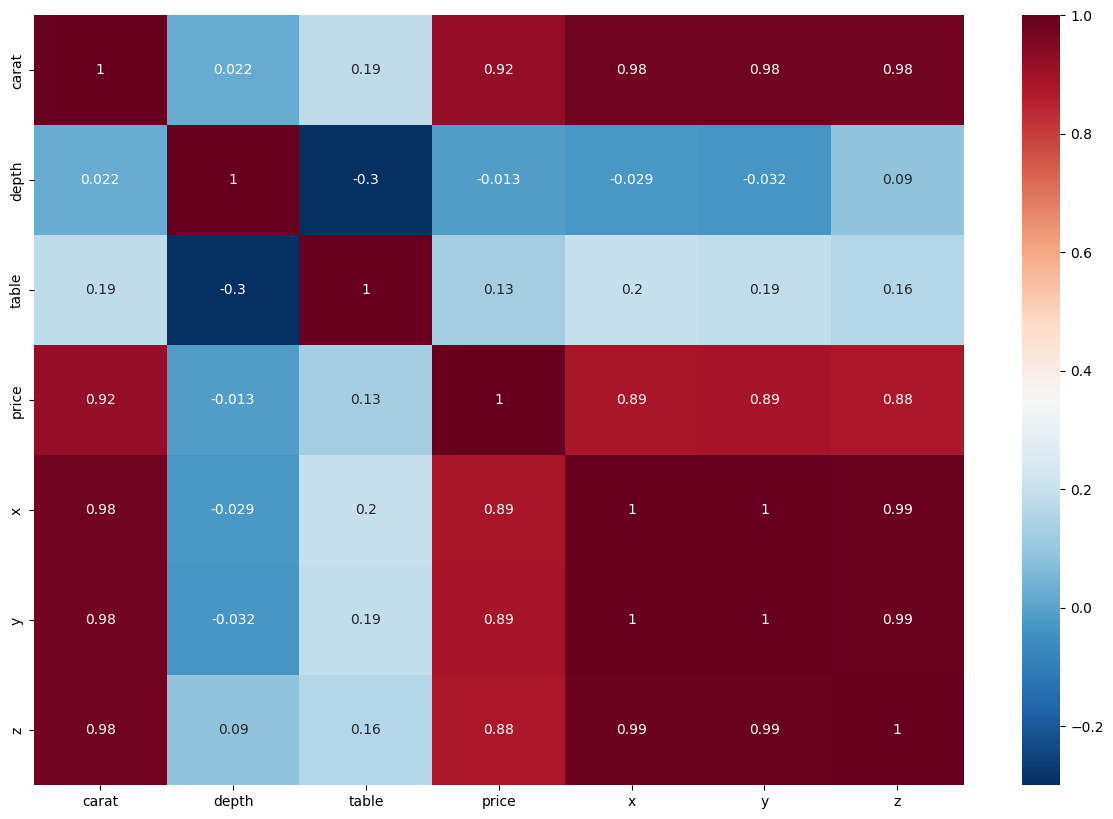

In [80]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),cmap='RdBu_r',annot=True)
plt.show()

**VI) ENCODING**

In [81]:
for i in cat_features:
  print(i, df[i].unique())

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [82]:
df['cut']=df.cut.map({'Ideal':5, 'Premium':4, 'Good':3, 'Very Good':2, 'Fair':1})
df['color']=df.color.map({'D':7,"E":6,"F":5,"G":4,"H":3,"I":2,"J":1})
df['clarity']=df.clarity.map({'SI2':2,'SI1':3, 'VS1':3,'VS2':4, 'VVS2':5,'VVS1':6, 'I1':1, 'IF':8})

In [83]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.50,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.80,61.0,326,3.89,3.84,2.31
2,0.23,3,6,3,58.75,63.5,327,4.05,4.07,2.31
3,0.29,4,2,4,62.40,58.0,334,4.20,4.23,2.63
4,0.31,3,1,2,63.30,58.0,335,4.34,4.35,2.75


**VII)Spliting the data**

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X=df.drop('price',axis=1)
Y=df['price']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=24)


**VIII)Scaling**

In [86]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #scaling the data
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.transform(X_test)

**2nd JAR**

1)SUPERVISED LEARNING PROBLEM

2)REGRESSION PROBLEM


**3rd JAR**

**BUILD THE MODEL**

In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [88]:
def model(Mod,X,Y):
  mod=Mod
  mod.fit(X,Y)
  res_train=round(r2_score(Y,mod.predict(X)),3)
  res_test=round(np.mean(cross_val_score(mod,X,Y,cv=10)),3)
  return mod,res_train,res_test


In [89]:
lr,res_train,res_test=model(LinearRegression(),X_train_scale,Y_train)

In [90]:
hyper_tuning=pd.DataFrame(columns=['K','train_score','val_score'])
for i in range(1,10):
   Knn,res_train,res_test=model(KNeighborsRegressor(i),X_train_scale,Y_train)
   result={'K':i,'train_score':res_train,'val_score':res_test}
   hyper_tuning.loc[len(hyper_tuning)]=result
hyp=hyper_tuning.sort_values(by=['val_score','train_score'], ascending=False)
hyp.head(1)


,K,train_score,val_score
7,8,0.969,0.959


In [91]:
Knn,res_train,res_test=model(KNeighborsRegressor(8),X_train_scale,Y_train)

In [92]:
hyper_tuning=pd.DataFrame(columns=['max_depth','train_score','val_score'])
for i in range(1,10):
   Dt,res_train,res_test=model(DecisionTreeRegressor(max_depth=i),X_train_scale,Y_train)
   result={'max_depth':i,'train_score':res_train,'val_score':res_test}
   hyper_tuning.loc[len(hyper_tuning)]=result
hyp=hyper_tuning.sort_values(by=['val_score','train_score'], ascending=False)
hyp.head(1)

,max_depth,train_score,val_score
8,9,0.972,0.966


In [93]:
Dt,res_train,res_test=model(DecisionTreeRegressor(max_depth=9),X_train_scale,Y_train)

In [94]:
hyper_tuning=pd.DataFrame(columns=['n_estimators','train_score','val_score'])
for i in range(1,100,10):
   rfc,res_train,res_test=model(RandomForestRegressor(n_estimators=i,random_state=27,max_features='sqrt',max_depth=5),X_train_scale,Y_train)
   result={'n_estimators':i,'train_score':res_train,'val_score':res_test}
   hyper_tuning.loc[len(hyper_tuning)]=result
hyp=hyper_tuning.sort_values(by=['val_score','train_score'], ascending=False)
hyp.head(1)

,n_estimators,train_score,val_score
9,91,0.935,0.934


In [95]:
 rfc,res_train,res_test=model(RandomForestRegressor(n_estimators=91,random_state=27,max_features='sqrt',max_depth=5),X_train_scale,Y_train)

In [96]:
hyper_tuning=pd.DataFrame(columns=['learning_rate','train_score','val_score'])
for i in np.arange(0.1,1.1,0.1):
   Xgb,res_train,res_test=model(XGBRegressor(learning_rate=i,n_estimators= 100,random_state=21,objective='reg:squarederror'),X_train_scale,Y_train)
   result={'learning_rate':i,'train_score':res_train,'val_score':res_test}
   hyper_tuning.loc[len(hyper_tuning)]=result
hyp=hyper_tuning.sort_values(by=['val_score','train_score'], ascending=False)
hyp.head(1)

,learning_rate,train_score,val_score
1,0.2,0.983,0.974


In [97]:
Xgb,res_train,res_test=model(xgb.XGBRegressor(learning_rate=0.2,n_estimators= 100,random_state=21),X_train_scale,Y_train)

**6 th JAR**

EVALUATION METRIC

In [98]:
from sklearn.metrics import r2_score

In [99]:
def evaluate(mod,X,Y):
  pred=mod.predict(X)
  r2=r2_score(Y,pred)
  return pred,r2

In [104]:
model=[lr,Knn,Dt,rfc,Xgb]
model_name=['linear regression','KNN',"Decision Tree",'Random Forest','Xgboost']
comparison_res=pd.DataFrame(Y_test.values,columns=['Actual result'])
R2_comp=pd.DataFrame(columns=['model','R2_score'])
for i in range(len(model)):
  pred,r2=evaluate(model[i],X_test_scale,Y_test)
  comparison_res[model_name[i]]=pred
  R2_comp.loc[len(R2_comp)]={'model':model_name[i],"R2_score":r2}

In [105]:
R2_comp

,model,R2_score
0,linear regression,0.906077
1,KNN,0.958839
2,Decision Tree,0.966022
3,Random Forest,0.933877
4,Xgboost,0.973235


In [106]:
comparison_res

,Actual result,linear regression,KNN,Decision Tree,Random Forest,Xgboost
0,1007,726.147244,983.000,957.361865,932.313977,933.034119
1,4794,4596.910057,4377.500,4298.169960,5118.063101,4453.547363
2,1646,1387.875605,1743.500,1698.955789,1721.658546,1684.995728
3,772,1192.075142,900.875,957.361865,919.840265,930.541382
4,776,425.236084,655.625,672.958621,726.669474,792.287842
...,...,...,...,...,...,...
13444,734,1279.539481,880.250,689.390852,721.807569,729.618103
13445,17068,15390.367890,16906.375,15804.969543,15319.836332,16617.726562
13446,1687,1854.220163,1686.000,1656.412909,1613.303096,1726.160767
13447,11149,10852.269997,10811.250,10444.631098,10354.355640,10282.214844


In [107]:
Y_test

37907     1007
10478     4794
45092     1646
31754      772
31866      776
         ...  
30595      734
26981    17068
45550     1687
23124    11149
7494      4239
Name: price, Length: 13449, dtype: int64

<Figure size 1500x1000 with 0 Axes>

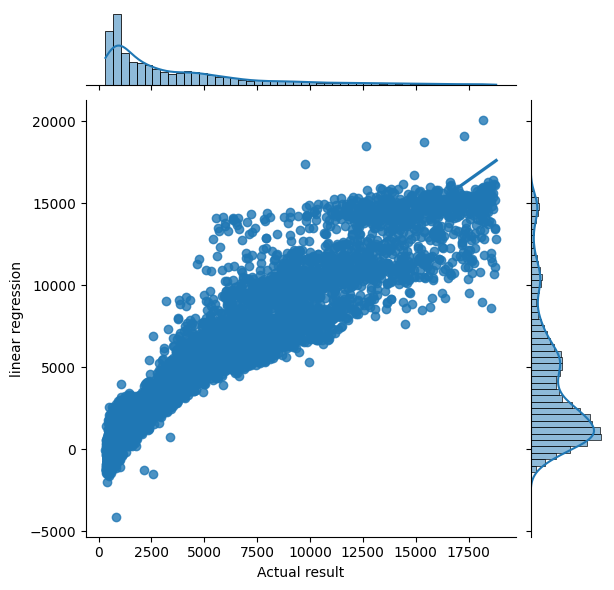

<Figure size 1500x1000 with 0 Axes>

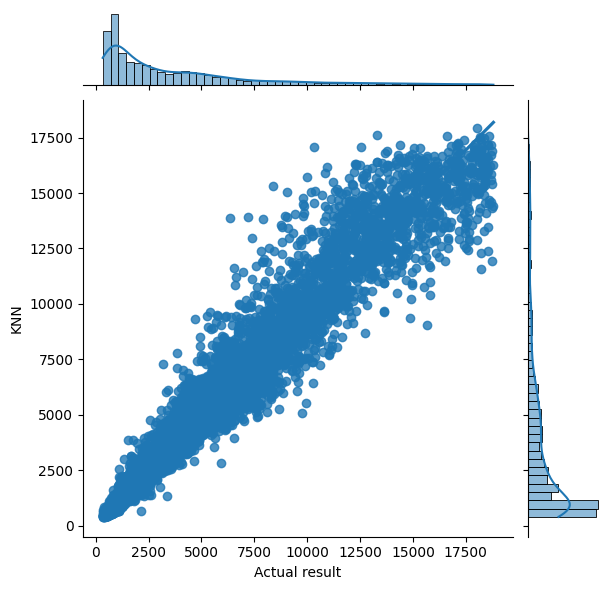

<Figure size 1500x1000 with 0 Axes>

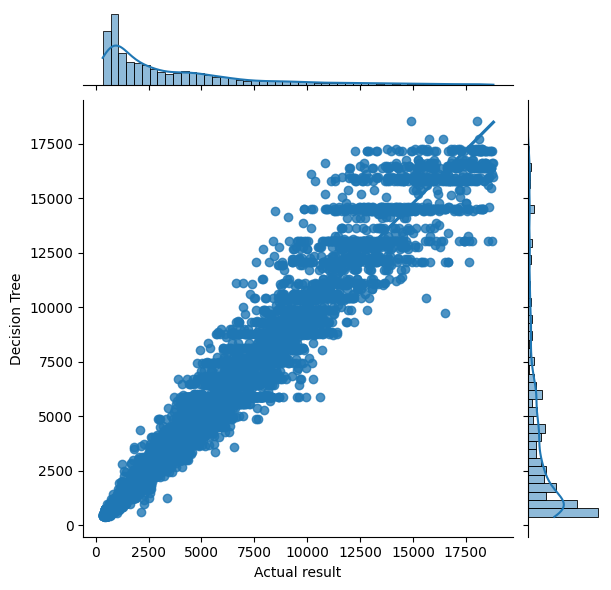

<Figure size 1500x1000 with 0 Axes>

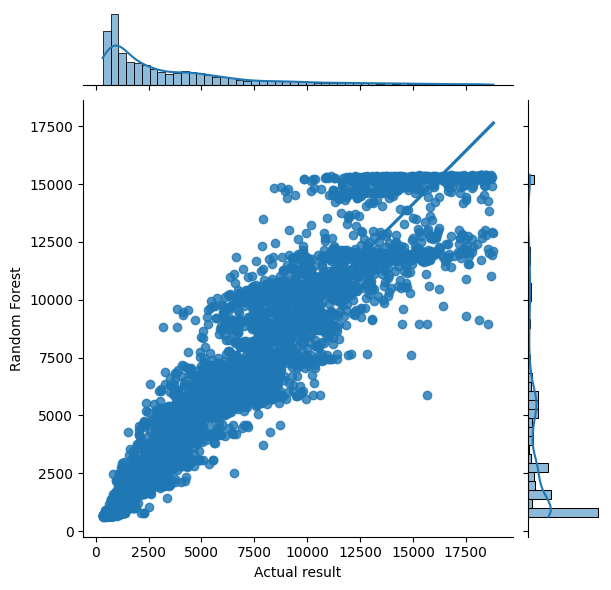

<Figure size 1500x1000 with 0 Axes>

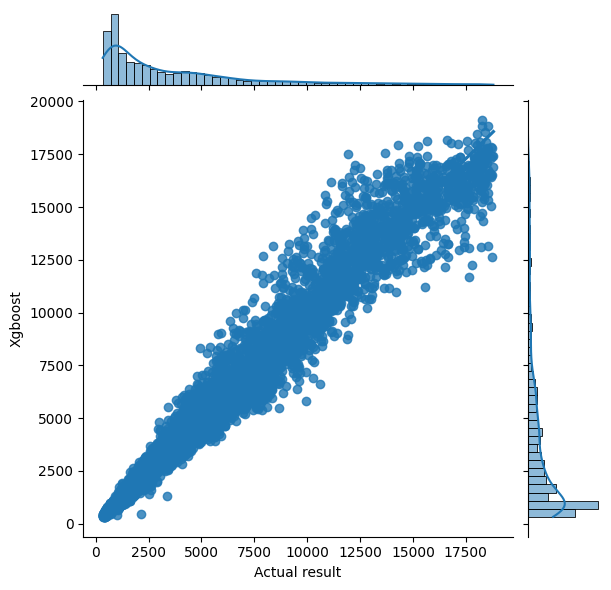

In [116]:
predict=comparison_res.drop('Actual result',axis=1)
for i in model_name:
  plt.figure(figsize=(15,10))
  sns.jointplot(x=comparison_res['Actual result'],y=comparison_res[i],data=comparison_res,kind='reg')   # plottig the graph between actual and predicted
  plt.show()